# WK14 Cafe Sales Exploratory Data Analysis
<hr style = "border:2.5px solid #126782"></hr>

Name: **Annaliza T. Amar** <br>
Course: **CPE2A**

Import **pandas**, **numpy**, and **matplotlib** library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Overview of the Dataset

Load the "**cafe-sales-dataset.csv**"

In [2]:
df = pd.read_csv(r"..\raw\cafe-sales-dataset.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


Display an **overview** of the dataset

In [3]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


## Determining **Distinct** values

In [4]:
df['Transaction ID'].unique()

array(['TXN_1961373', 'TXN_4977031', 'TXN_4271903', ..., 'TXN_5255387',
       'TXN_7695629', 'TXN_6170729'], shape=(10000,), dtype=object)

In [5]:
df['Transaction ID'].nunique()

10000

In [6]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [7]:
df['Item'].nunique()

10

In [8]:
df['Quantity'].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [9]:
df['Quantity'].nunique()

7

In [10]:
df['Price Per Unit'].unique()

array(['2.0', '3.0', '1.0', '5.0', '4.0', '1.5', nan, 'ERROR', 'UNKNOWN'],
      dtype=object)

In [11]:
df['Price Per Unit'].nunique()

8

In [12]:
df['Total Spent'].unique()

array(['4.0', '12.0', 'ERROR', '10.0', '20.0', '9.0', '16.0', '15.0',
       '25.0', '8.0', '5.0', '3.0', '6.0', nan, 'UNKNOWN', '2.0', '1.0',
       '7.5', '4.5', '1.5'], dtype=object)

In [13]:
df['Total Spent'].nunique()

19

In [14]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

In [15]:
df['Payment Method'].nunique()

5

In [16]:
df['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

In [17]:
df['Location'].nunique()

4

In [18]:
df['Transaction Date'].unique()

array(['2023-09-08', '2023-05-16', '2023-07-19', '2023-04-27',
       '2023-06-11', '2023-03-31', '2023-10-06', '2023-10-28',
       '2023-07-28', '2023-12-31', '2023-11-07', 'ERROR', '2023-05-03',
       '2023-06-01', '2023-03-21', '2023-11-15', '2023-06-10',
       '2023-02-24', '2023-03-25', '2023-01-15', '2023-04-04',
       '2023-03-30', '2023-12-01', '2023-09-18', '2023-06-03',
       '2023-12-13', '2023-04-20', '2023-04-10', '2023-03-11',
       '2023-06-02', '2023-11-06', '2023-08-15', '2023-10-09',
       '2023-05-28', '2023-07-17', '2023-04-29', '2023-06-08',
       '2023-06-29', '2023-04-17', '2023-12-22', '2023-01-10',
       '2023-10-02', '2023-02-23', '2023-03-22', '2023-11-03',
       '2023-03-02', '2023-06-26', '2023-05-02', '2023-09-05',
       '2023-01-08', '2023-03-15', '2023-11-25', '2023-12-05',
       '2023-03-19', '2023-06-27', '2023-04-19', '2023-10-07',
       '2023-09-30', '2023-05-27', '2023-11-18', '2023-10-20',
       '2023-10-03', '2023-10-27', '2023-04-06

In [19]:
df['Transaction Date'].nunique()

367

## Data Cleaning

Determine the **count of NaN** (*Not a Number*) values

In [20]:
df.isna().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

**Convert** the columns to **numeric types**

In [21]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

Dropping NaN

In [22]:
# Cleaning Payment Method
df = df.dropna(subset=['Payment Method'])
df.isna().sum()

Transaction ID         0
Item                 251
Quantity             347
Price Per Unit       393
Total Spent          370
Payment Method         0
Location            2417
Transaction Date     320
dtype: int64

In [23]:
# Cleaning Location
df = df.dropna(subset=['Location'])
df.isna().sum()

Transaction ID        0
Item                171
Quantity            232
Price Per Unit      264
Total Spent         242
Payment Method        0
Location              0
Transaction Date    211
dtype: int64

In [24]:
df = df.dropna(subset=['Payment Method','Location'])
df.isna().sum()

Transaction ID        0
Item                171
Quantity            232
Price Per Unit      264
Total Spent         242
Payment Method        0
Location              0
Transaction Date    211
dtype: int64

In [25]:
df['Payment Method'] = df['Payment Method'].replace({'ERROR': 'Other', 'UNKNOWN': 'Other'})
df['Location'] = df['Location'].replace({'ERROR': 'Other', 'UNKNOWN': 'Other'})

Replacing NaN with **Mean**

In [26]:
# Cleaning Quantity with mean
quantity_mean = df['Quantity'].mean()
print(quantity_mean)
df['Quantity'] = df['Quantity'].fillna(quantity_mean)

3.024518021793797


In [27]:
# Cleaning Price Per Unit with mean
price_mean = df['Price Per Unit'].mean()
print(price_mean)
df['Price Per Unit'] = df['Price Per Unit'].fillna(price_mean)

2.953270042194093


In [28]:
# Cleaning Total Spent with mean
total_mean = df['Total Spent'].mean()
print(total_mean)
df['Total Spent'] = df['Total Spent'].fillna(total_mean)

8.914846703065939


Replacing NaN with **Mode**

In [29]:
# Cleaning Item with mode
item_mode = df['Item'].mode()[0]
print(item_mode)
df['Item'] = df['Item'].fillna(item_mode)
df['Item'] = df['Item'].replace({'ERROR': item_mode, 'UNKNOWN': item_mode})

Salad


In [30]:
# Cleaning Transaction Date with mode
date_mode = df['Transaction Date'].mode()[0]
print(date_mode)
df['Transaction Date'] = df['Transaction Date'].fillna(date_mode)

2023-03-13 00:00:00


## **Saving** the Cleaned Dataset

In [31]:
df.to_csv(r"..\raw\cafe-sales-dataset-cleaned.csv",index=False)

Load the "**cafe-sales-dataset-cleaned.csv**"

In [32]:
df = pd.read_csv(r"..\raw\cafe-sales-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    5004 non-null   object 
 1   Item              5004 non-null   object 
 2   Quantity          5004 non-null   float64
 3   Price Per Unit    5004 non-null   float64
 4   Total Spent       5004 non-null   float64
 5   Payment Method    5004 non-null   object 
 6   Location          5004 non-null   object 
 7   Transaction Date  5004 non-null   object 
dtypes: float64(3), object(5)
memory usage: 312.9+ KB


## Measures of Central Tendency

Display the **mean**

In [33]:
# Quantity mean
quantity_mean = df['Quantity'].mean()
print(quantity_mean)

3.0245180217937966


In [34]:
# Price Per Unit mean
price_mean = df['Price Per Unit'].mean()
print(price_mean)

2.953270042194093


In [35]:
# Total Spent mean
total_mean = df['Total Spent'].mean()
print(total_mean)

8.914846703065939


Display the **Median**

In [36]:
# Quantity median
quantity_median = df['Quantity'].median()
print(quantity_median)

3.0


In [37]:
# Price Per Unit median
price_median = df['Price Per Unit'].median()
print(price_median)

3.0


In [38]:
# Total Spent median
total_median = df['Total Spent'].median()
print(total_median)

8.0


Display the **mode**

In [39]:
# Quantity mode
quantity_mode = df['Quantity'].mode()[0]
print(quantity_mode)

5.0


In [40]:
# Price Per Unit mode
price_mode = df['Price Per Unit'].mode()[0]
print(price_mode)

3.0


In [41]:
# Total Spent mode
total_mode = df['Total Spent'].mode()[0]
print(total_mode)

6.0


## Measures of Variability

Return the **range**

In [42]:
# Quantity range
quantity_range = df['Quantity'].max() - df['Quantity'].min()
print("Quantity Range = " + str(quantity_range))

Quantity Range = 4.0


In [43]:
# Price Per Unit range
price_range = df['Price Per Unit'].max() - df['Price Per Unit'].min()
print("Price Per Unit Range = $ " + str(price_range))

Price Per Unit Range = $ 4.0


In [44]:
# Total Spent range
total_range = df['Total Spent'].max() - df['Total Spent'].min()
print("Total Spent Range = $ " + str(total_range))

Total Spent Range = $ 24.0


Return the **variance**

In [45]:
# Quantity Variance
quantity_variance = df['Quantity'].var()
print("Quantity Variance = " + str(quantity_variance))

Quantity Variance = 1.9064823888567113


In [46]:
# Price Per Unit Variance
price_variance = df['Price Per Unit'].var()
print("Price Per Unit Variance = $ " + str(price_variance))

Price Per Unit Variance = $ 1.5880270466412136


In [47]:
# Total Spent Variance
total_variance = df['Total Spent'].var()
print("Total Spent Variance = $ " + str(total_variance))

Total Spent Variance = $ 34.49084955788392


Return the **standard deviation**

In [48]:
# Quantity standard deviation
quantity_sd = df['Quantity'].std()
print("Quantity Standard Deviation = " + str(quantity_sd.round(1)))

Quantity Standard Deviation = 1.4


In [49]:
# Price Per Unit standard deviation
price_sd = df['Price Per Unit'].std()
print("Price Per Unit Standard Deviation = $ " + str(price_sd.round(1)))

Price Per Unit Standard Deviation = $ 1.3


In [50]:
# Total Spent standard deviation
total_sd = df['Total Spent'].std()
print("Total Spent Standard Deviation = $ " + str(total_sd.round(1)))

Total Spent Standard Deviation = $ 5.9


Return the **coefficient of variance**

In [51]:
# Quantity coefficient of variance
quantity_cv = quantity_sd/df['Quantity'].mean()
print ("Quantity Coefficient of Variance = " + str(quantity_cv.round(2)))

Quantity Coefficient of Variance = 0.46


In [52]:
# Price Per Unit coefficient of variance
price_cv = price_sd/df['Price Per Unit'].mean()
print ("Price Per Unit Coefficient of Variance = " + str(price_cv.round(2)))

Price Per Unit Coefficient of Variance = 0.43


In [53]:
# Total Spent coefficient of variance
total_cv = total_sd/df['Total Spent'].mean()
print ("Total Spent Coefficient of Variance = " + str(total_cv.round(2)))

Total Spent Coefficient of Variance = 0.66


Visualize the **Measures of Variability** using **Boxplot**

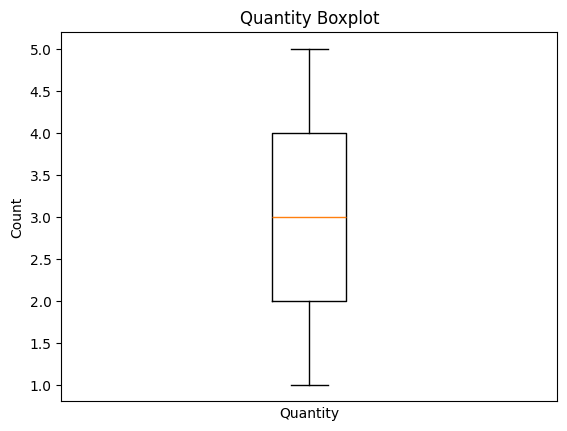

In [54]:
plt.boxplot(df['Quantity'])
plt.title("Quantity Boxplot")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.xticks([])
plt.show()

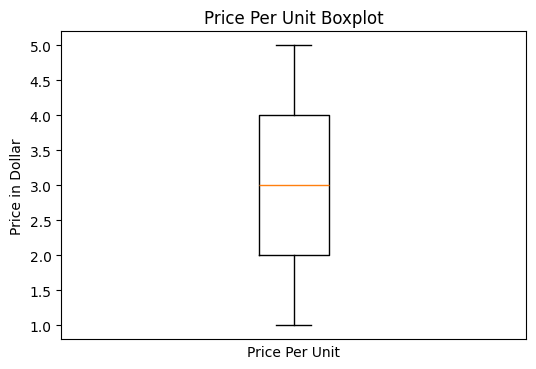

In [55]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Price Per Unit'])
plt.title("Price Per Unit Boxplot")
plt.xlabel("Price Per Unit")
plt.ylabel("Price in Dollar")
plt.xticks([])
plt.show()

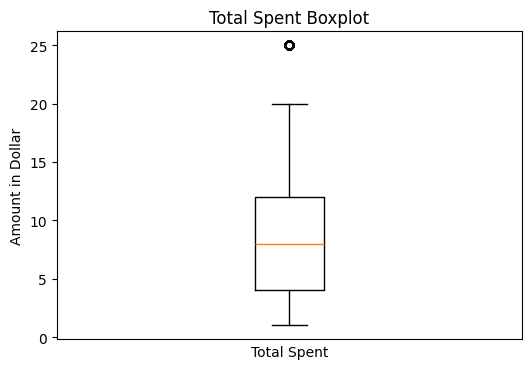

In [56]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Total Spent'])
plt.title("Total Spent Boxplot")
plt.xlabel("Total Spent")
plt.ylabel("Amount in Dollar")
plt.xticks([])
plt.show()

## Data Visualization

### Item Sales Distribution

In [57]:
item_counts = df['Item'].value_counts()
item_counts

Item
Salad       1082
Juice        589
Cookie       584
Sandwich     583
Cake         575
Tea          547
Coffee       529
Smoothie     515
Name: count, dtype: int64

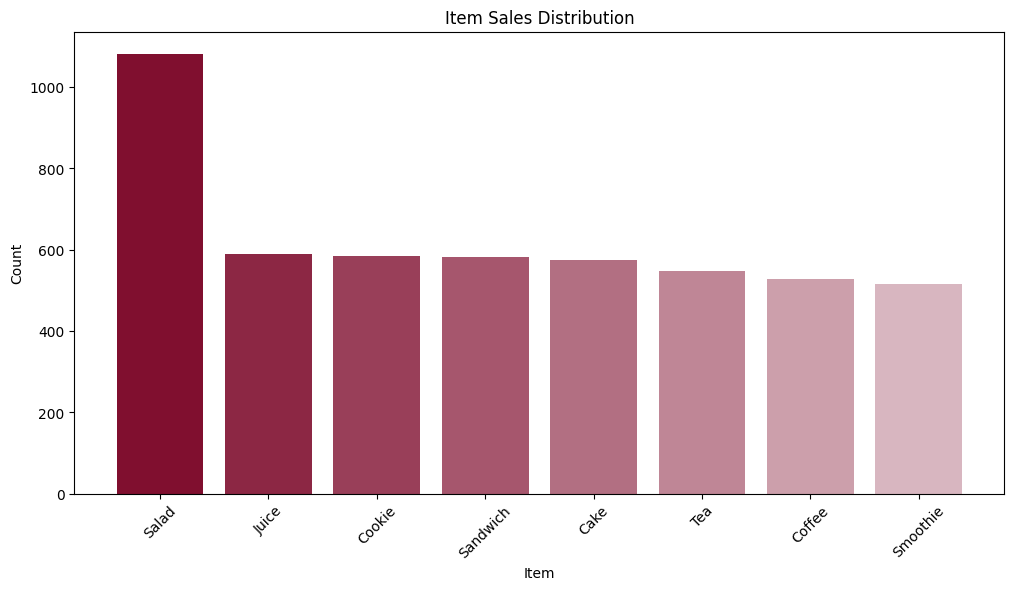

In [58]:
num_bars = 8
alphas = np.linspace(1, 0.3, num_bars)
colors = [(0.502, 0.0588, 0.1843, alpha) for alpha in alphas]

plt.figure(figsize=(12, 6))
plt.bar(item_counts.index, item_counts.values, color=colors)
plt.xticks(rotation=45)
plt.title('Item Sales Distribution')
plt.xlabel('Item')
plt.ylabel('Count')
plt.show()

The bar chart shows the distribution of item sales, highlighting which products are the most and least popular. Some items have significantly higher sales, indicating customer favorites or bestsellers, while others are purchased less frequently. This insight can help guide inventory management, marketing strategies, and product promotion efforts to maximize revenue and meet customer demand.

### Revenue Trend Over Time

In [59]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
revenue_trend = df.groupby(df['Transaction Date'].dt.date)['Total Spent'].sum()
revenue_trend

Transaction Date
2023-01-01    149.414847
2023-01-02    111.829693
2023-01-03    100.659387
2023-01-04    119.500000
2023-01-05    276.000000
                 ...    
2023-12-27     98.500000
2023-12-28    107.500000
2023-12-29    112.829693
2023-12-30    131.000000
2023-12-31     89.329693
Name: Total Spent, Length: 365, dtype: float64

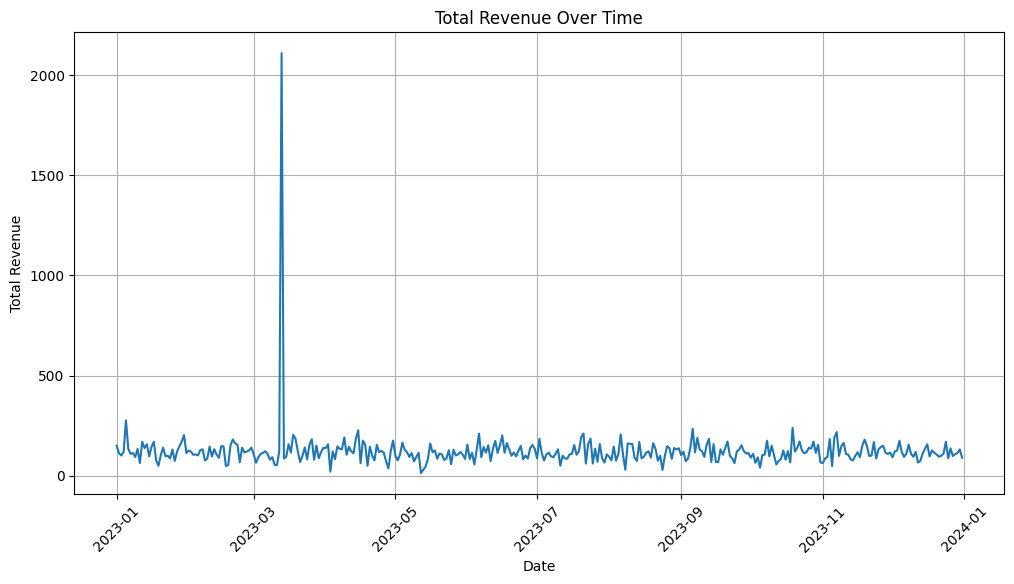

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(revenue_trend)
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.show()

The line chart illustrates the revenue trend over time, showing how total sales fluctuate across different dates. Noticeable spikes or drops in revenue could indicate seasonal trends, promotions, or shifts in customer behavior. Analyzing these patterns helps identify peak sales periods and informs strategic decisions for inventory, staffing, and marketing to optimize future revenue growth.

### Payment Method Breakdown

In [61]:
payment_counts = df['Payment Method'].value_counts()
payment_counts

Payment Method
Digital Wallet    1588
Cash              1527
Credit Card       1516
Other              373
Name: count, dtype: int64

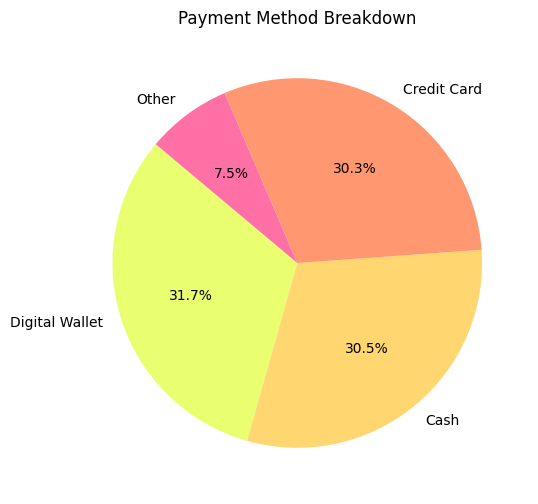

In [62]:
plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors = ["#e9ff70", "#ffd670", "#ff9770", "#ff70a6"])
plt.title('Payment Method Breakdown')
plt.show()

The pie chart illustrates the distribution of payment methods, showing how customers prefer to pay. The data highlights the most commonly used methods, helping to understand customer preferences and optimize payment options.

### Sales by Location

In [63]:
location_sales = df.groupby('Location')['Total Spent'].sum().sort_values()
location_sales

Location
Other        4589.115708
Takeaway    19661.547984
In-store    20359.229210
Name: Total Spent, dtype: float64

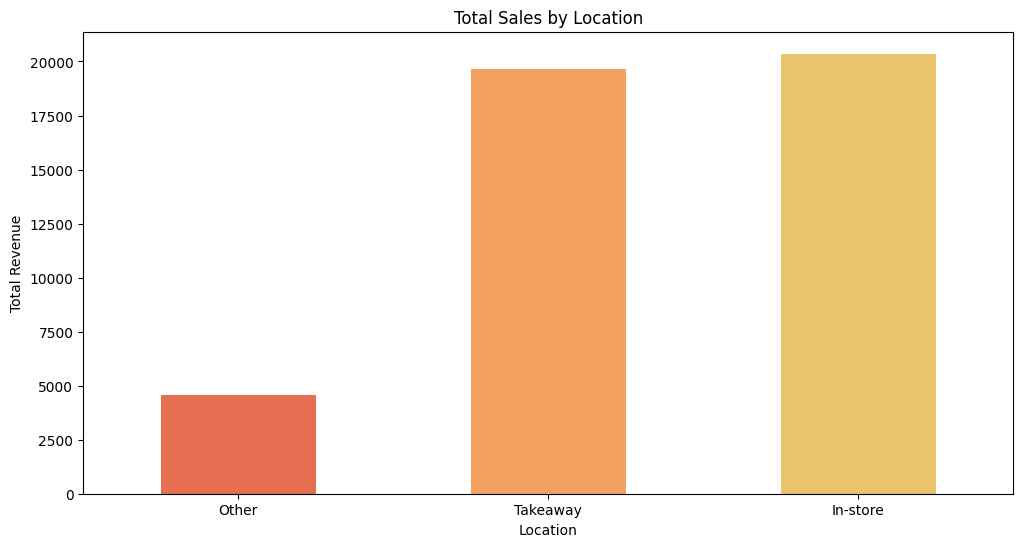

In [64]:
plt.figure(figsize=(12, 6))
location_sales.plot(kind='bar', color =['#e76f51','#f4a261','#e9c46a'])
plt.title('Total Sales by Location')
plt.xlabel('Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

The bar chart shows the total revenue generated at each location, revealing which branches or stores contribute the most to overall sales. Locations with higher revenue could indicate stronger customer demand, better product offerings, or more effective local marketing. Conversely, lower-performing locations might benefit from targeted promotions or operational adjustments. This insight helps guide decision-making for resource allocation and growth strategies.

### Quantity vs Total Spent

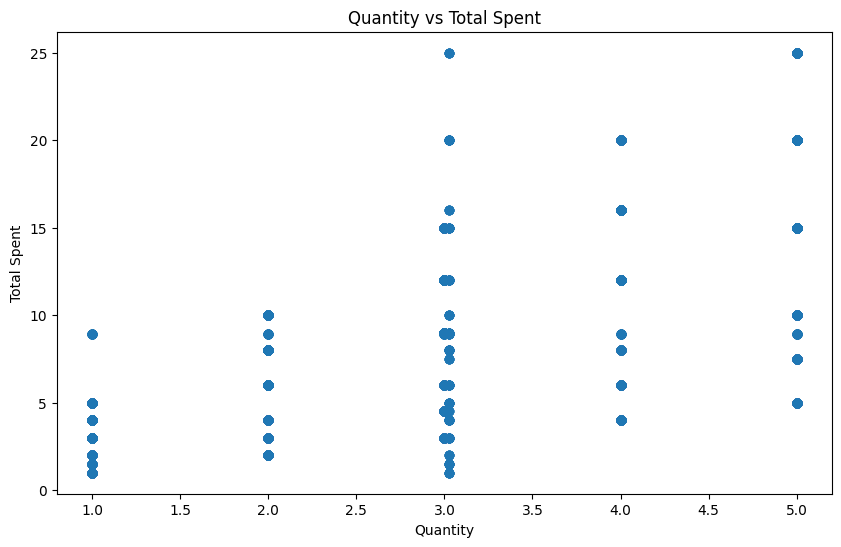

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Total Spent'])
plt.title('Quantity vs Total Spent')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.show()


The scatter plot analysis reveals a clear positive correlation between Quantity and Total Spent, indicating that higher item quantities generally lead to higher spending. However, the presence of outliers suggests instances of high-priced items or bulk discounts. These insights provide valuable information about customer purchasing patterns, helping to identify potential pricing anomalies and better understand sales trends.

### Boxplot for Total Spent

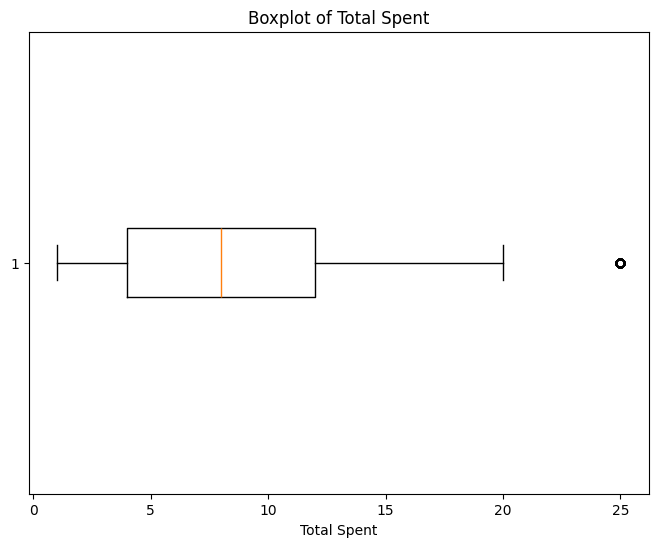

In [66]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Total Spent'].dropna(), vert=False)
plt.title('Boxplot of Total Spent')
plt.xlabel('Total Spent')
plt.show()

The boxplot of Total Spent shows that most customers spend within a typical range, but there are some unusually high transactions that stand out as outliers. These large purchases could be bulk orders or high-priced items that significantly boost revenue. Understanding this pattern helps identify big spenders who contribute more to overall sales, which can guide future marketing and pricing strategies.

### Histogram for Total Spent

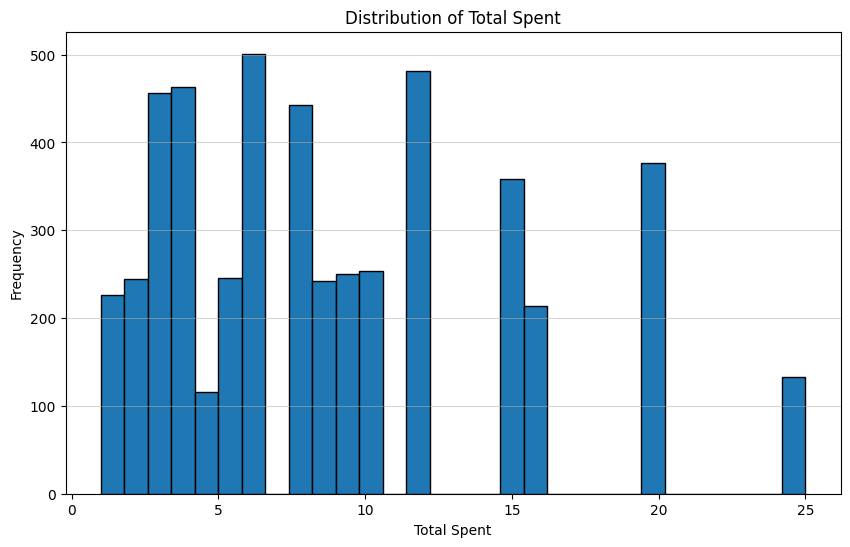

In [67]:
plt.figure(figsize=(10, 6))
plt.hist(df['Total Spent'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

The histogram of Total Spent shows how transaction amounts are distributed. Most transactions fall within the lower spending ranges, meaning customers typically make smaller purchases. However, there are fewer transactions at higher spending amounts, indicating occasional large purchases. This distribution helps understand customer spending habits and highlights the presence of high-value transactions that can significantly impact overall revenue.

### Histogram for Quantity Sold

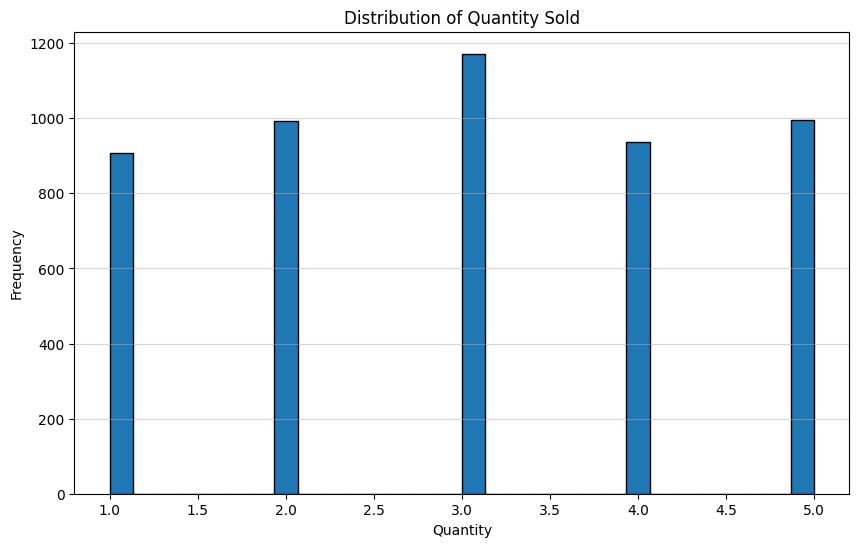

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

The histogram for Quantity Sold shows that most transactions involve smaller quantities, with fewer instances of large bulk purchases. This suggests that typical customer behavior leans toward buying just a few items per visit, while occasional high-quantity sales contribute less frequently but could still drive significant revenue.

## Conclusion

Through our exploratory data analysis, we uncovered valuable insights into cafe sales patterns. The distribution of **Quantity**, **Price Per Unit**, and **Total Spent** revealed potential outliers and variations in customer spending behavior. Sales trends showed revenue spikes on certain dates, suggesting promotional events or peak periods. **Payment methods** and **location-based sales** highlighted customer preferences, while item sales distributions identified the most and least popular products. These findings provide a solid foundation for making data-driven decisions, optimizing inventory, and refining sales strategies to maximize revenue.